<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Load" data-toc-modified-id="Model-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Load</a></span></li><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Devolution" data-toc-modified-id="Devolution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Devolution</a></span><ul class="toc-item"><li><span><a href="#Deconv-Model" data-toc-modified-id="Deconv-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Deconv Model</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Max-Activation-=-False" data-toc-modified-id="Max-Activation-=-False-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Max Activation = False</a></span></li><li><span><a href="#Max-Activation-=-True" data-toc-modified-id="Max-Activation-=-True-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Max Activation = True</a></span></li></ul></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CIFAR10</a></span><ul class="toc-item"><li><span><a href="#Max-Activation-=-False" data-toc-modified-id="Max-Activation-=-False-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Max Activation = False</a></span></li><li><span><a href="#Max-Activation-=-True" data-toc-modified-id="Max-Activation-=-True-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Max Activation = True</a></span></li></ul></li><li><span><a href="#SmoothGrad" data-toc-modified-id="SmoothGrad-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></li></ul></div>

**Reference**
- https://github.com/huybery/VisualizingCNN

In [2]:
import torch
from torch.autograd import Variable

import numpy as np
import sys
import os 
from functools import partial

sys.path.append('../code')
from model import SimpleCNN, DeconvNet
from dataload import mnist_load, cifar10_load
from deconvnet import DeconvNet
from utils import get_example_params

import matplotlib.pyplot as plt

print('Model Checkpoints')
print(os.listdir('../checkpoint'))
print()
print('Model Logs')
print(os.listdir('../logs'))

# config
image_save = False

Model Checkpoints
['resnet50_cifar10.pth', 'resnet50_mnist.pth', 'simple_cnn_cifar10.pth', 'simple_cnn_mnist.pth']

Model Logs
['resnet50_cifar10_logs.txt', 'resnet50_mnist_logs.txt', 'simple_cnn_cifar10_logs.txt', 'simple_cnn_mnist_logs.txt']


In [3]:
original_images, pre_images, target_classes, model = get_example_params('mnist')

Data Complete
Model Complete


In [5]:
print('original_images.shape: ',original_images.shape)
print('pre_images.shape: ',pre_images.shape)
print('target_classes: ',target_classes)

original_images.shape:  (10, 28, 28, 1)
pre_images.shape:  (10, 1, 28, 28)
target_classes:  {0: '0 - zero', 1: '1 - one', 2: '2 - two', 3: '3 - three', 4: '4 - four', 5: '5 - five', 6: '6 - six', 7: '7 - seven', 8: '8 - eight', 9: '9 - nine'}


# Model Load

In [2]:
mnist_simplecnn = torch.load('../checkpoint/simple_cnn_mnist.pth')
cifar10_simplecnn = torch.load('../checkpoint/simple_cnn_cifar10.pth')

In [3]:
model_mnist = SimpleCNN(1, 128*3*3)
model_mnist.load_state_dict(mnist_simplecnn['model'])

Model Complete


<All keys matched successfully>

In [4]:
model_cifar10 = SimpleCNN(3, 128*4*4)
model_cifar10.load_state_dict(cifar10_simplecnn['model'])

Model Complete


<All keys matched successfully>

# Data Load

**MNIST**

In [5]:
_, _, testloader = mnist_load(1, 0.2, True)
mnist_test = testloader.dataset

# idx2class
mnist_class2idx = mnist_test.class_to_idx
mnist_idx2class = dict(zip(list(mnist_class2idx.values()), list(mnist_class2idx.keys())))
mnist_idx2class

Data Complete


{0: '0 - zero',
 1: '1 - one',
 2: '2 - two',
 3: '3 - three',
 4: '4 - four',
 5: '5 - five',
 6: '6 - six',
 7: '7 - seven',
 8: '8 - eight',
 9: '9 - nine'}

**CIFAR10**

In [4]:
_, _, testloader = cifar10_load(1, 0.2, True)
cifar10_test = testloader.dataset

# idx2class
cifar10_class2idx = cifar10_test.class_to_idx
cifar10_idx2class = dict(zip(list(cifar10_class2idx.values()), list(cifar10_class2idx.keys())))
cifar10_idx2class

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete


{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

# Functions

In [24]:
def store(model):
    """
    make hook for feature map
    """
    def hook(module, input, output, key):
        if isinstance(module, torch.nn.MaxPool2d):
            model.feature_maps[key] = output[0]
            model.pool_locs[key] = output[1]
        else:
            model.feature_maps[key] = output
    
    for idx, layer in enumerate(model._modules.get('features')):    
        # _modules returns an OrderedDict
        layer.register_forward_hook(partial(hook, key=idx))

In [25]:
store(model_mnist)

In [26]:
store(model_cifar10)

# Devolution

In [23]:
def deconv_visualization(model, deconv_model, layer, max_activation):
    # feature size
    num_feat = model.feature_maps[layer].shape[1]
    new_feat_map = model.feature_maps[layer].clone()

    if max_activation:
        # max feature
        act_lst = []
        for i in range(0, num_feat):
            choose_map = new_feat_map[0, i, :, :]
            activation = torch.max(choose_map)
            act_lst.append(activation.item())

        act_lst = np.array(act_lst)
        mark = np.argmax(act_lst)

        choose_map = new_feat_map[0, mark, :, :]
        max_activation = torch.max(choose_map)

        if mark == 0:
            new_feat_map[:, 1:, :, :] = 0
        else:
            new_feat_map[:, :mark, :, :] = 0
            if mark != num_feat - 1:
                new_feat_map[:, mark + 1:, :, :] = 0

        choose_map = torch.where(choose_map == max_activation,
                                 choose_map,
                                 torch.zeros(choose_map.shape))

        new_feat_map[0, mark, :, :] = choose_map

        # output deconvnet
        deconv_output = deconv_model(new_feat_map, layer, model.pool_locs)

    else:
        # output deconvnet
        deconv_output = deconv_model(model.feature_maps[layer], layer, model.pool_locs)

    # denormalization
    new_img = deconv_output.data.numpy()[0].transpose(1, 2, 0) # (H,W,C)
    new_img = (new_img - new_img.min()) / (new_img.max() - new_img.min()) * 255
    new_img = new_img.astype(np.uint8)
    
    return new_img

## Deconv Model

In [11]:
mnist_model_deconv = DeconvNet('mnist',1,128*3*3)
cifar10_model_deconv = DeconvNet('cifar10',3,128*4*4)

## MNIST

In [13]:
# select image
first_idx_by_class = [np.where(mnist_test.targets==i)[0][0].item() for i in range(10)]
imgs = mnist_test.data.numpy()[first_idx_by_class]
true_classes = mnist_test.targets.numpy()[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

### Max Activation = False

In [27]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:] + (1,)) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0

# Evaluation mode
model_mnist.eval()
    
for img in imgs:
    # transform image
    trans_img = mnist_test.transform(img)
    trans_img = trans_img.unsqueeze_(0)
    
    pred = model_mnist(trans_img).detach().squeeze().numpy()
    pred_idx = np.argmax(pred)
    pred = pred[pred_idx]

    probs[cnt//3] = pred
    preds[cnt//3] = pred_idx
    
    for conv_idx in conv_layer_idx:
        output = deconv_visualization(model_mnist, 
                                      mnist_model_deconv, 
                                      conv_idx,
                                      False)
        outputs[cnt] = output
        cnt += 1

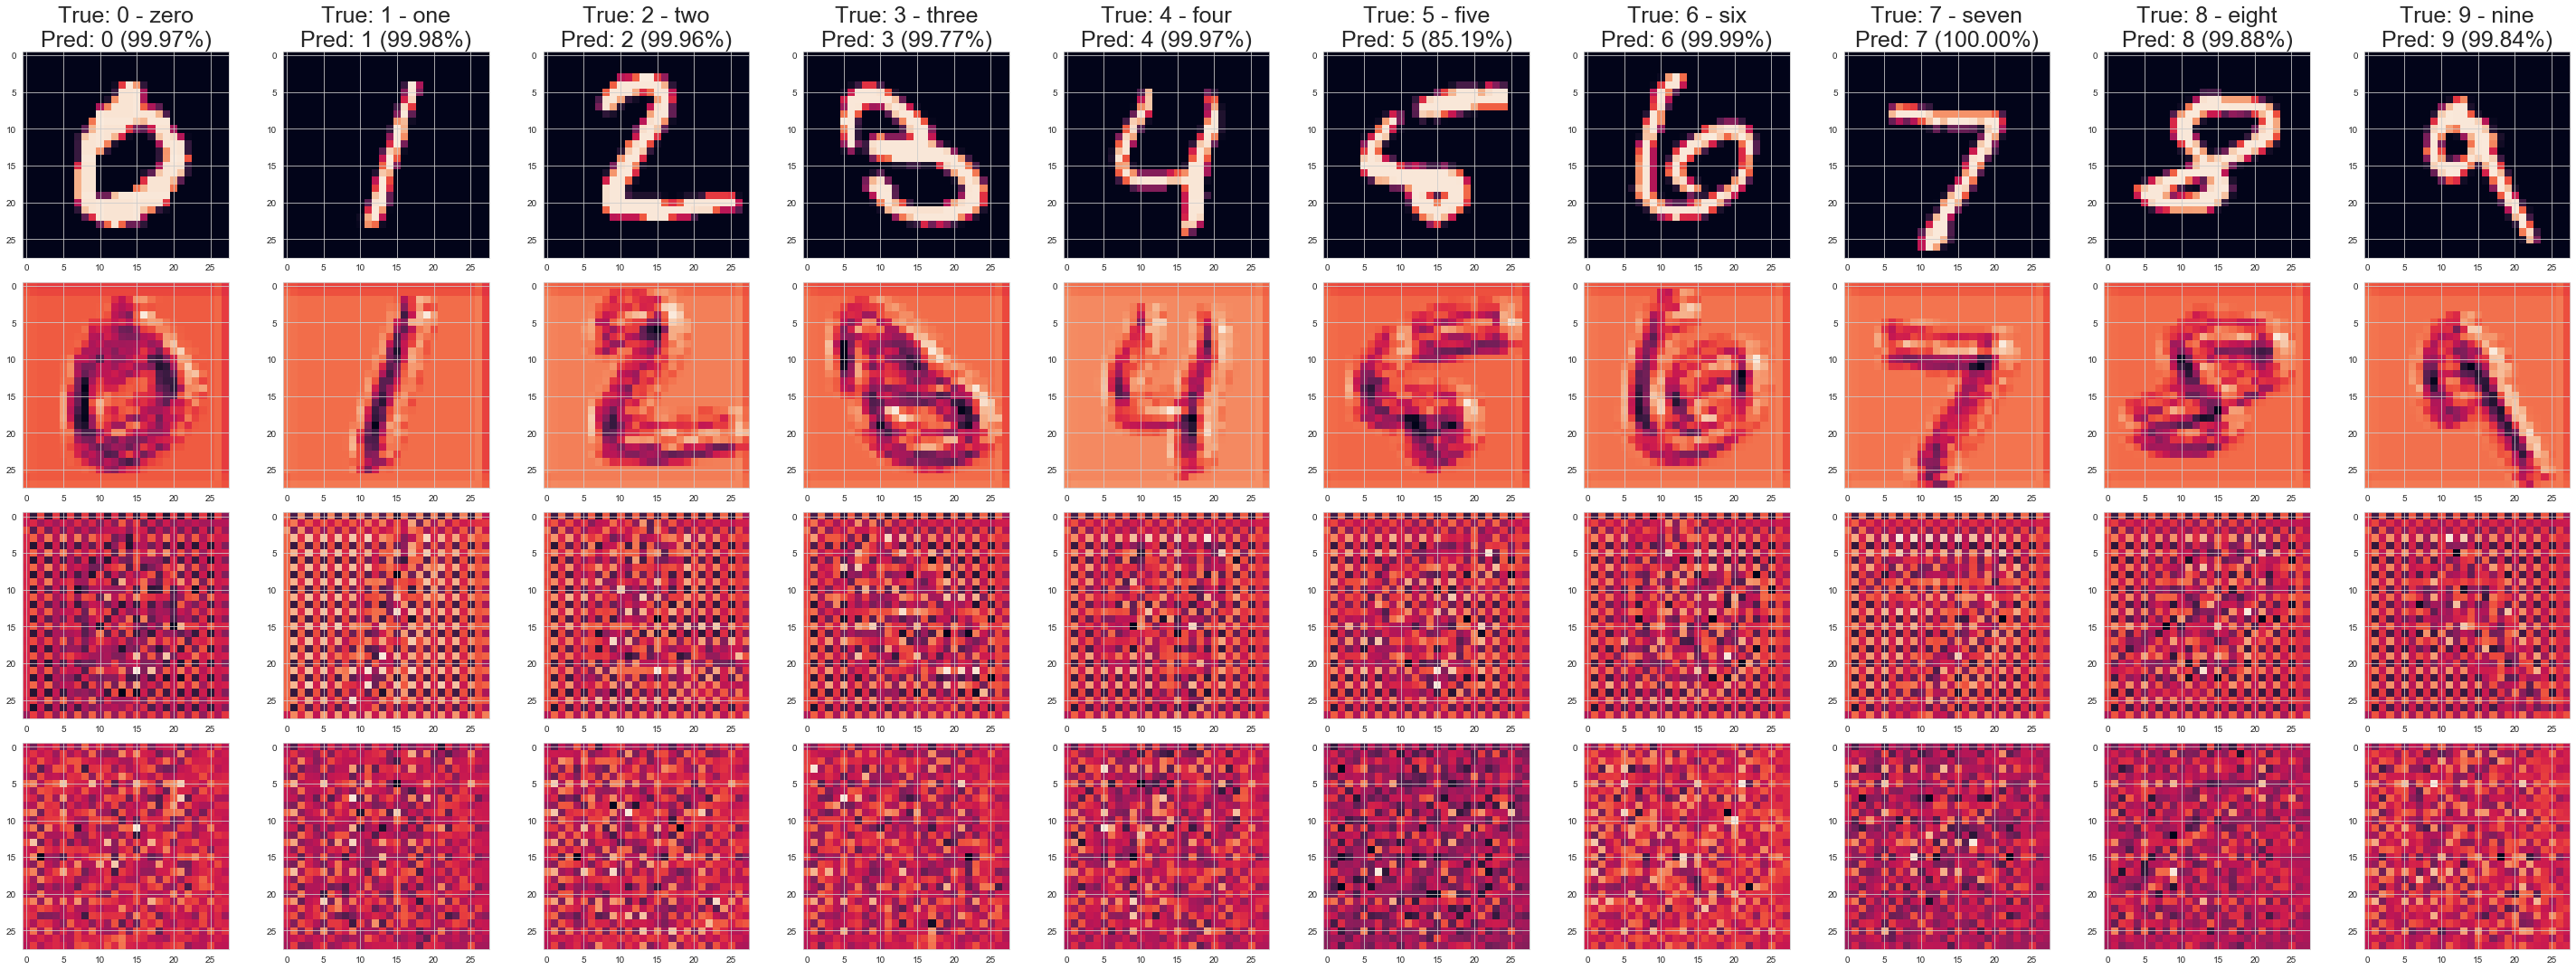

In [15]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].reshape((28,28)))
    ax[2, i].imshow(outputs[1+(i*3)].reshape((28,28)))
    ax[3, i].imshow(outputs[2+(i*3)].reshape((28,28)))

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result.jpg', dpi=500)
    plt.show()

### Max Activation = True

In [19]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:] + (1,)) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0

# pred image
model_mnist.eval()
for img in imgs:
    # transform image
    trans_img = mnist_transform(img)
    trans_img = trans_img.unsqueeze_(0)

    pred = model_mnist(trans_img).detach().squeeze().numpy()
    pred_idx = np.argmax(pred)
    pred = pred[pred_idx]

    probs[cnt//3] = pred
    preds[cnt//3] = pred_idx
    
    for conv_idx in conv_layer_idx:
        output = deconv_visualization(model_mnist, 
                                      mnist_model_deconv, 
                                      conv_idx,
                                      True)
        outputs[cnt] = output
        cnt += 1

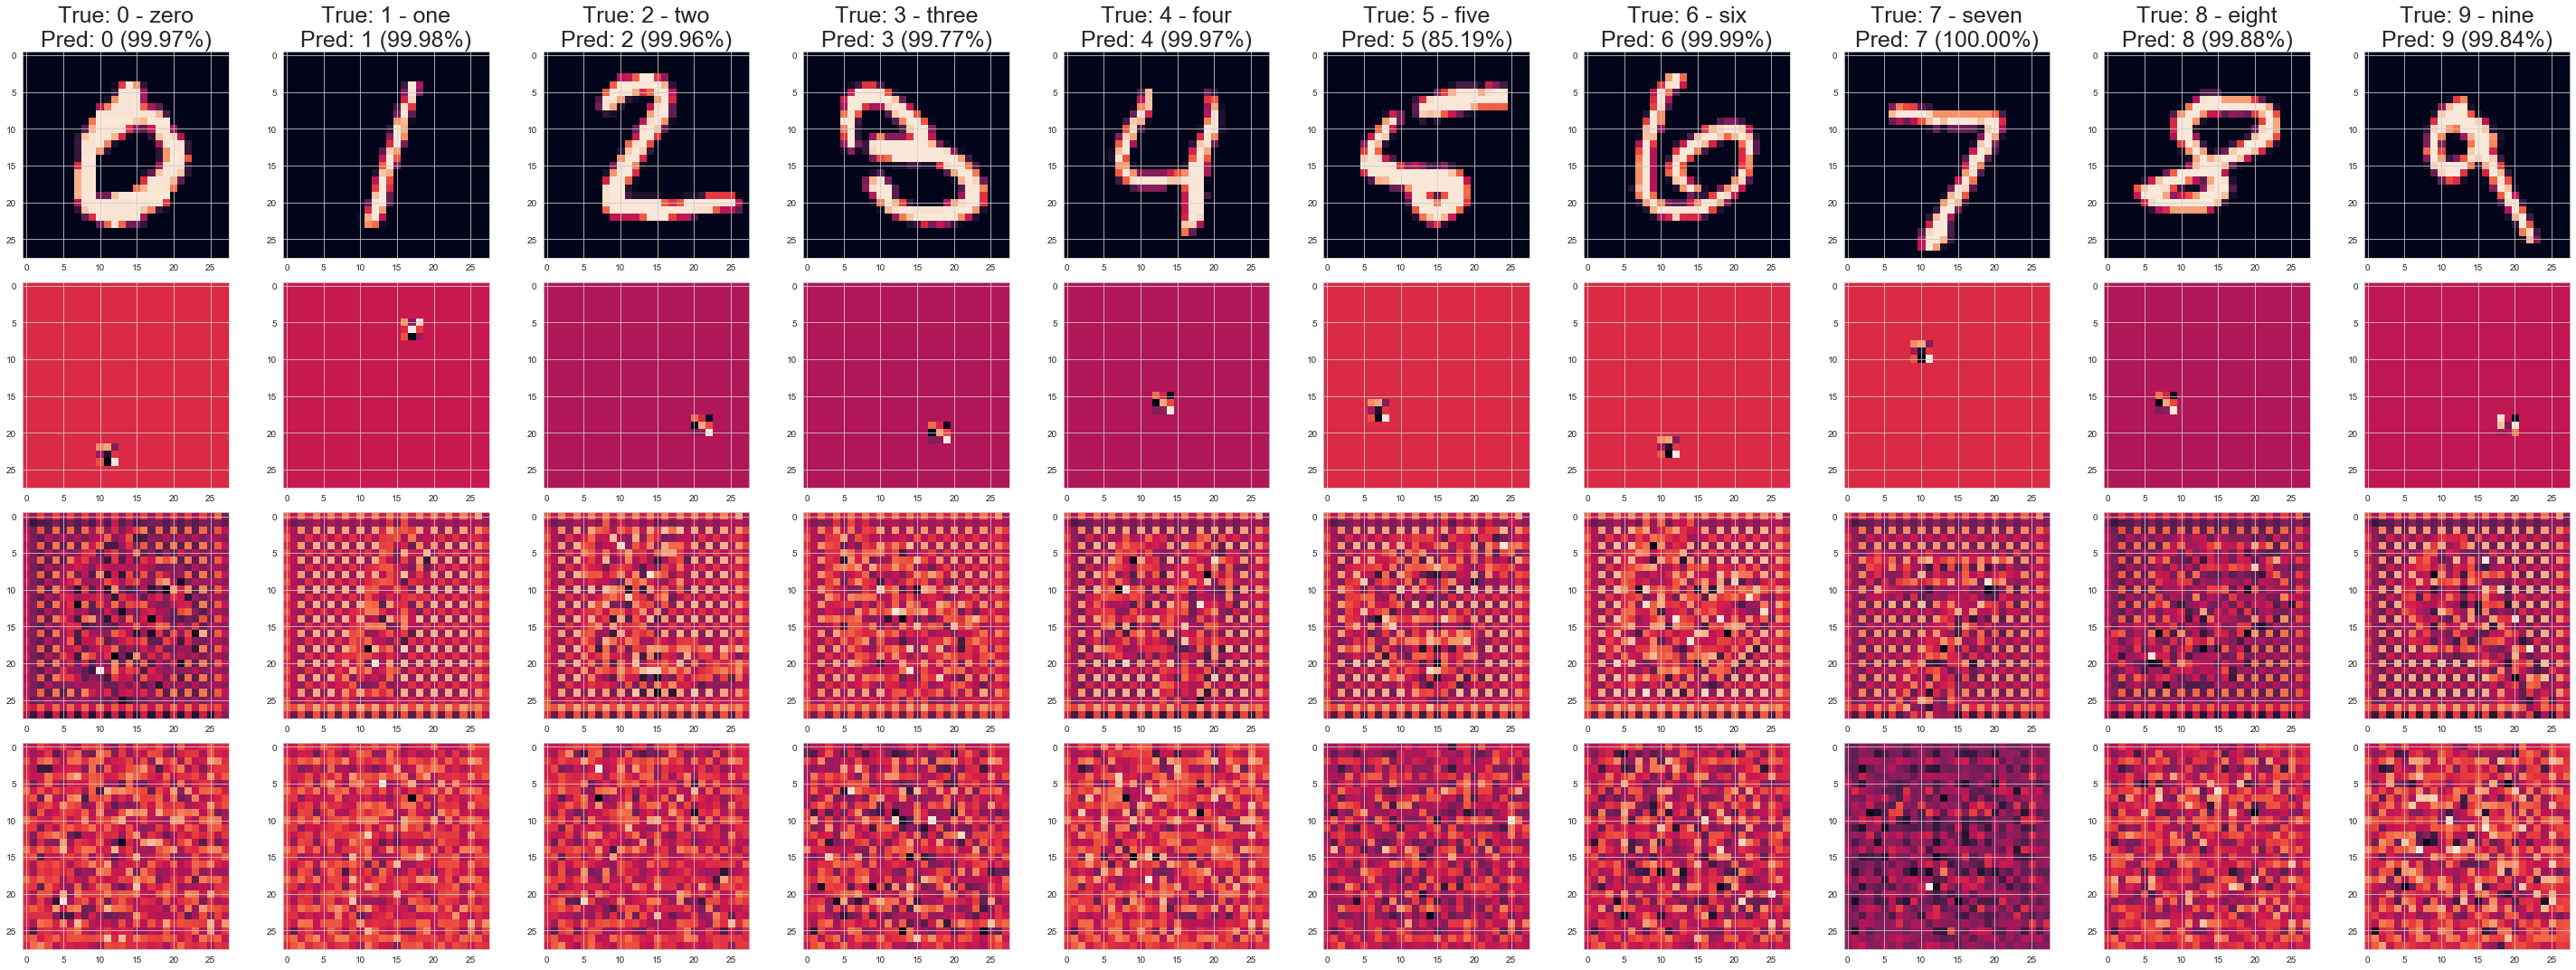

In [21]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].reshape((28,28)))
    ax[2, i].imshow(outputs[1+(i*3)].reshape((28,28)))
    ax[3, i].imshow(outputs[2+(i*3)].reshape((28,28)))

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result(MaxActivation).jpg', dpi=500)
    plt.show()

## CIFAR10

In [5]:
# select image
first_idx_by_class = [np.where(np.array(cifar10_test.targets)==i)[0][0] for i in range(10)]
imgs = cifar10_test.data[first_idx_by_class]
true_classes = np.array(cifar10_test.targets)[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

### Max Activation = False

In [32]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:]) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0

# pred image
model_cifar10.eval()
for img in imgs:
    # transform image
    trans_img = cifar10_transform(img)
    trans_img = trans_img.unsqueeze_(0)

    pred = model_cifar10(trans_img).detach().squeeze().numpy()
    pred_idx = np.argmax(pred)
    pred = pred[pred_idx]

    probs[cnt//3] = pred
    preds[cnt//3] = pred_idx
    
    for conv_idx in conv_layer_idx:
        output = deconv_visualization(model_cifar10, 
                                      cifar10_model_deconv, 
                                      conv_idx,
                                      False)
        outputs[cnt] = output
        cnt += 1

In [33]:
# TODO : 왜 함수안에서 바꿔주는데 mnist는 되고 cifar10은 안되지?
outputs = outputs.astype(np.uint8)

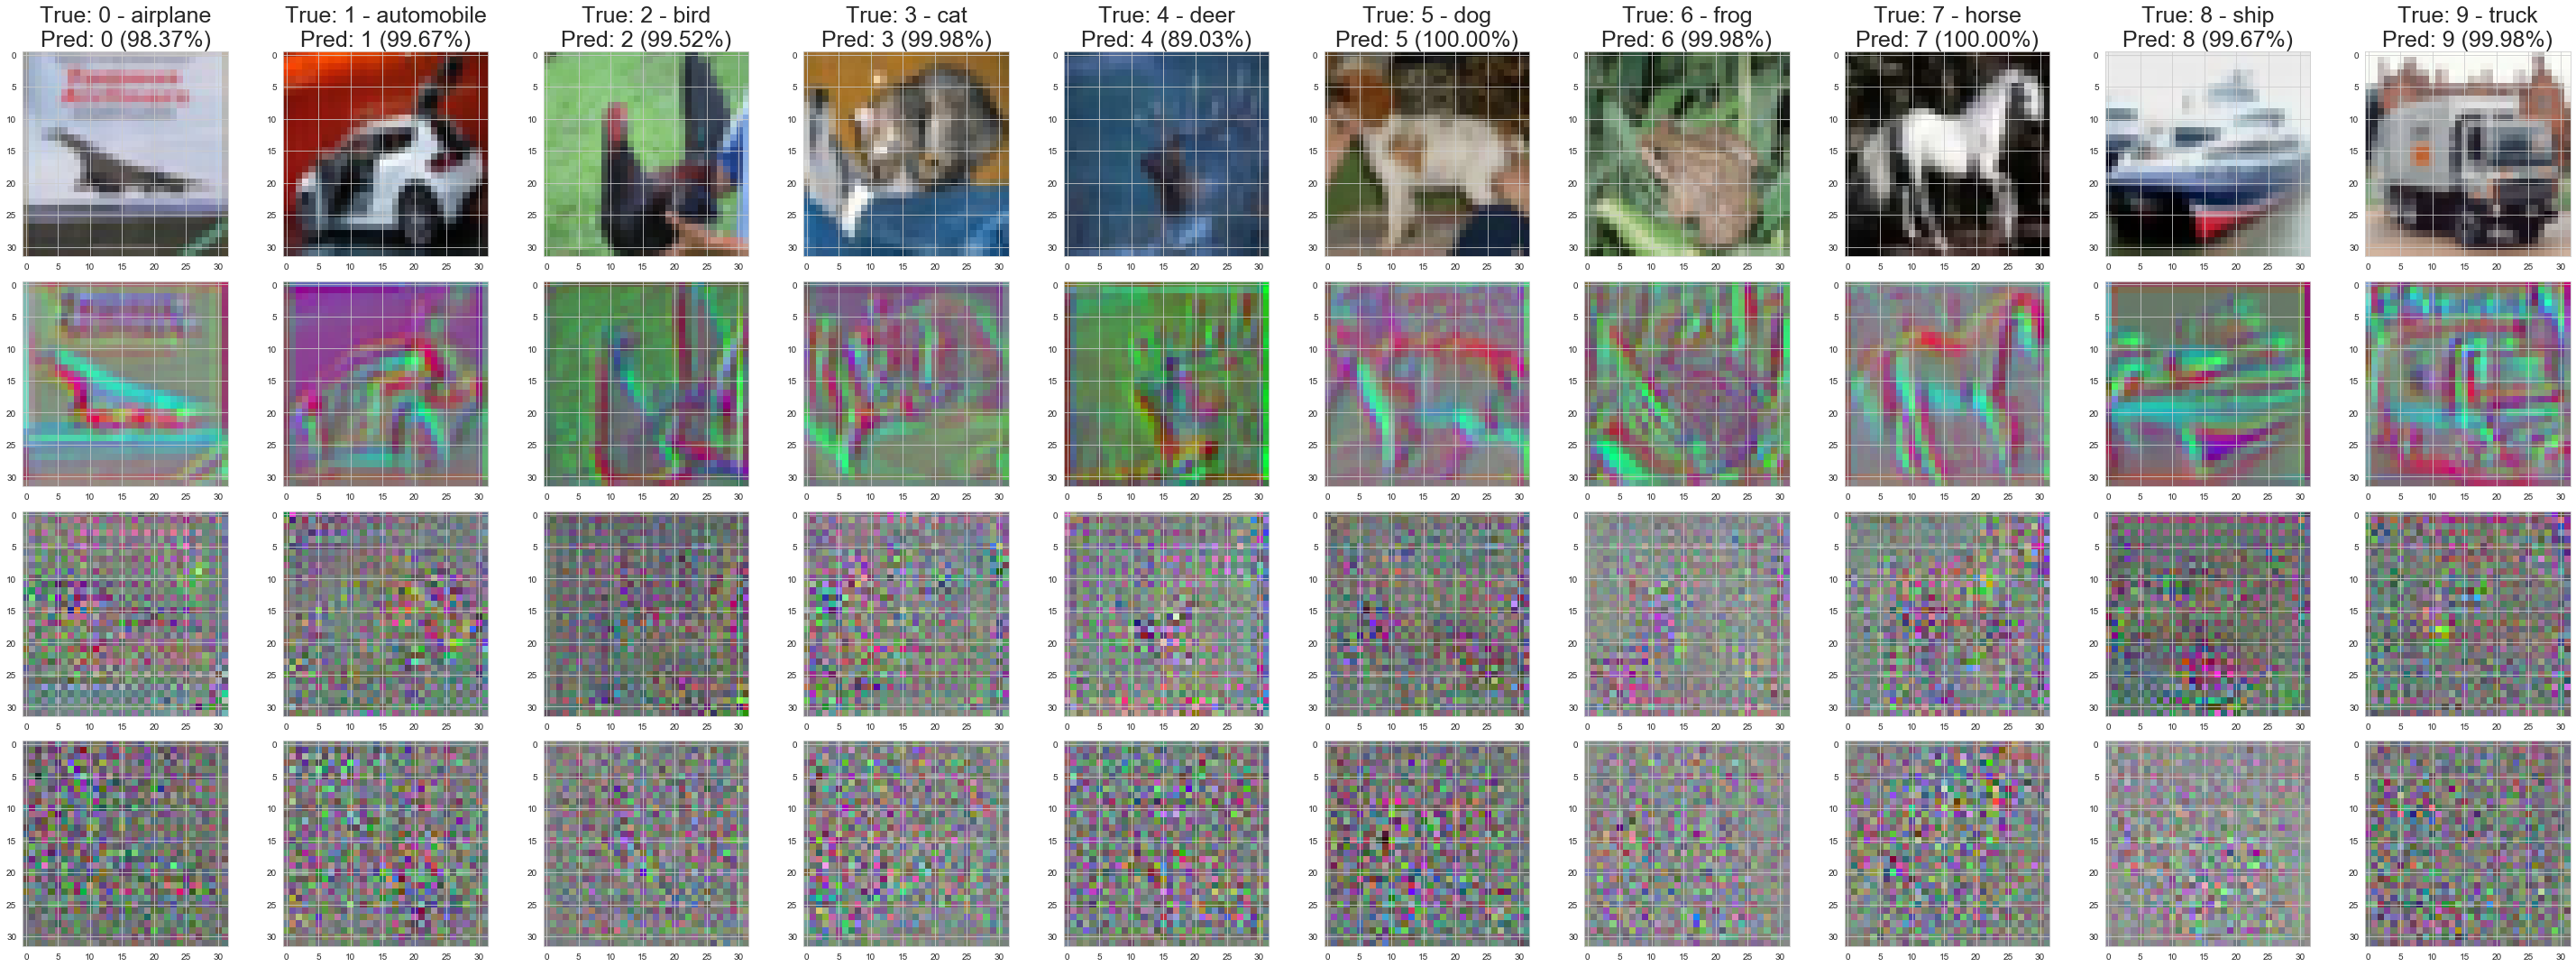

In [34]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:} - {1:}\nPred: {2:} ({3:.2%})'.format(i, cifar10_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar10_result.jpg', dpi=500)
    plt.show()

### Max Activation = True

In [35]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:]) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0

# pred image
model_cifar10.eval()
for img in imgs:
    # transform image
    trans_img = cifar10_transform(img)
    trans_img = trans_img.unsqueeze_(0)

    pred = model_cifar10(trans_img).detach().squeeze().numpy()
    pred_idx = np.argmax(pred)
    pred = pred[pred_idx]

    probs[cnt//3] = pred
    preds[cnt//3] = pred_idx
    
    for conv_idx in conv_layer_idx:
        output = deconv_visualization(model_cifar10, 
                                      cifar10_model_deconv, 
                                      conv_idx,
                                      True)
        outputs[cnt] = output
        cnt += 1

In [36]:
outputs = outputs.astype(np.uint8)

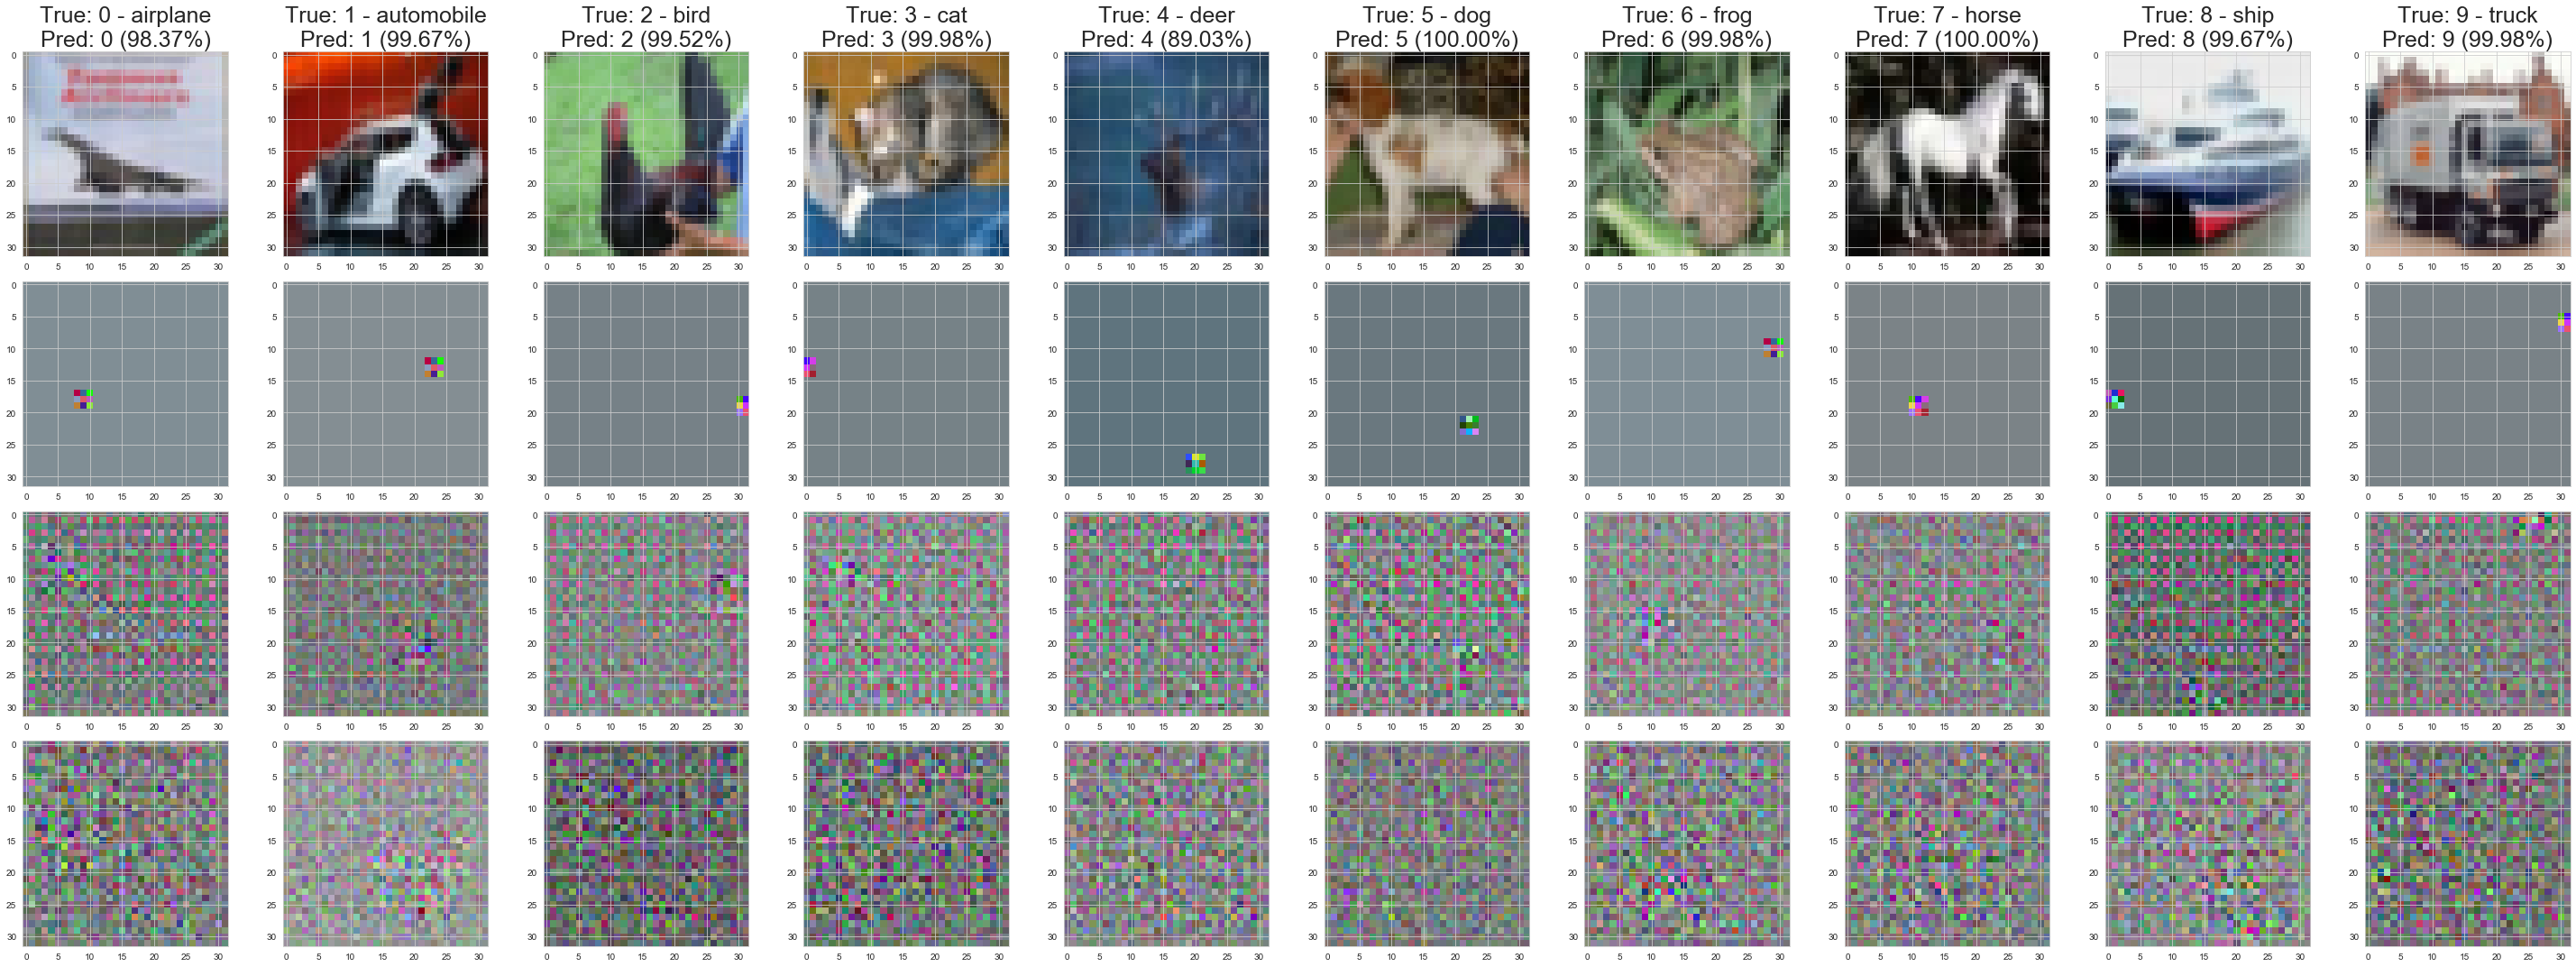

In [37]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:} - {1:}\nPred: {2:} ({3:.2%})'.format(i, cifar10_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar10_result(MaxActivation).jpg', dpi=500)
    plt.show()

## SmoothGrad

### MNIST

In [76]:
# select image
first_idx_by_class = [torch.where(mnist_test.targets==i)[0][0].item() for i in range(10)]
imgs = mnist_test.data.numpy()[first_idx_by_class]
true_classes = mnist_test.targets.numpy()[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

In [77]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:] + (1,)) # (nb_class * nb_conv_layer, image size)
cnt = 0

# set parameter
param_n = 50
param_sigma_multiplier = 10

# pred image
model_mnist.eval()

for img in imgs:
    # transform image
    trans_img = mnist_transform(img)
    trans_img = trans_img.unsqueeze_(0)
    
    # normal distribution parameters
    mean = 0
    sigma = param_sigma_multiplier / (torch.max(trans_img) - torch.min(trans_img)).item()

    # Generate noise
    noise = Variable(trans_img.data.new(trans_img.size()).normal_(mean, sigma**2))
    # Add noise to the image
    noisy_img = trans_img + noise

    for conv_idx in conv_layer_idx:
        # make smooth_grad array
        smooth_grad = np.zeros(((param_n,) + img.shape + (1,)))        
        
        for x in range(param_n):
            # predict
            pred = model_mnist(noisy_img).detach()
            
            # generate feature map
            output = deconv_visualization(model_mnist, 
                                          mnist_model_deconv, 
                                          conv_idx,
                                          False)
            smooth_grad[x] = output
        
        smooth_grad / param_n
            
        outputs[cnt] = output
        cnt += 1

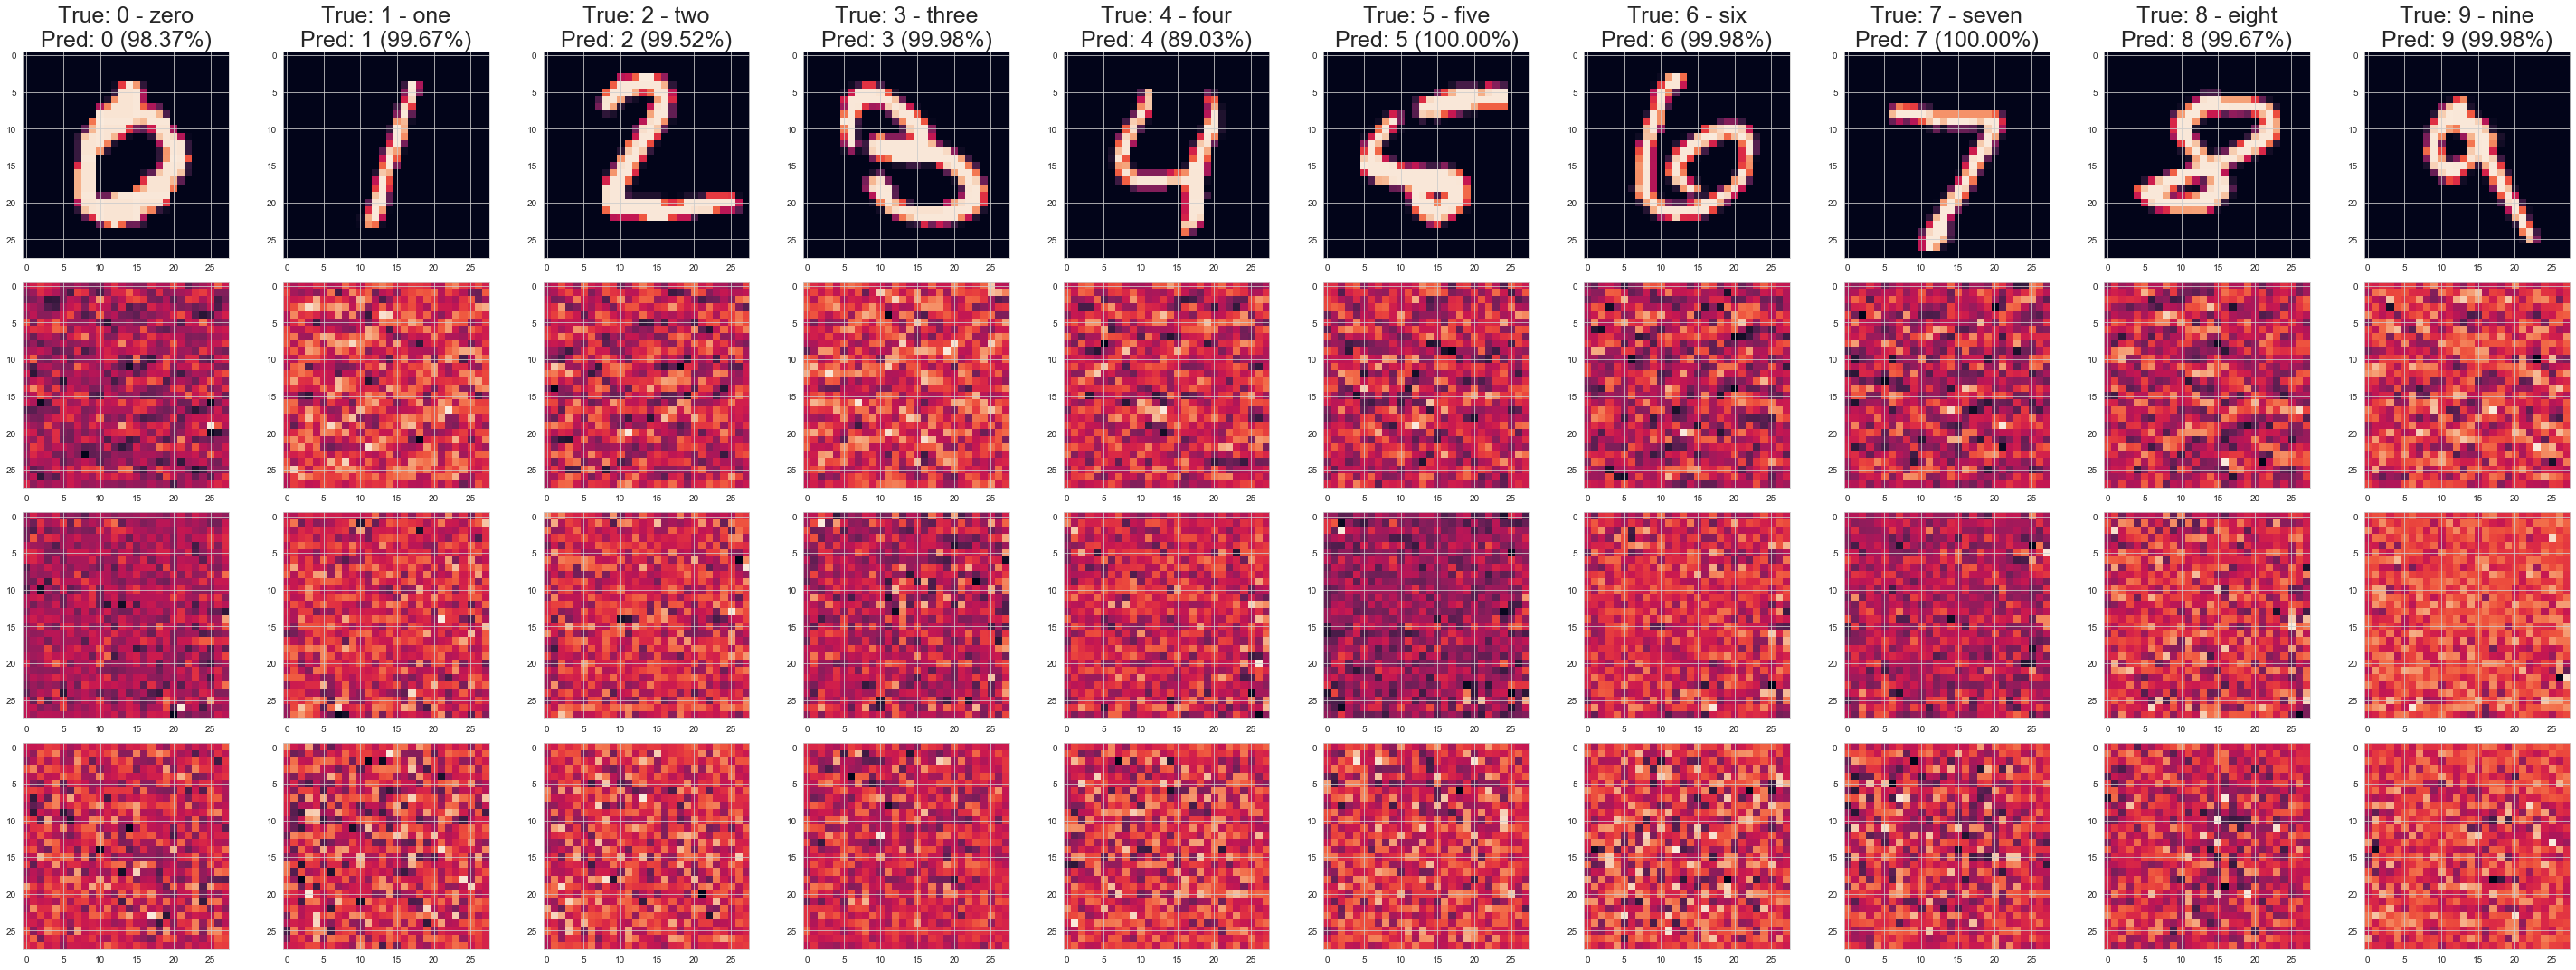

In [78]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].reshape((28,28)))
    ax[2, i].imshow(outputs[1+(i*3)].reshape((28,28)))
    ax[3, i].imshow(outputs[2+(i*3)].reshape((28,28)))

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result_SmoothGrad(n{},sigma{}).jpg'.format(param_n, param_sigma_multiplier), dpi=500)
    plt.show()

### CIFAR10

In [79]:
# select image
first_idx_by_class = [np.where(np.array(cifar10_test.targets)==i)[0][0] for i in range(10)]
imgs = cifar10_test.data[first_idx_by_class]
true_classes = np.array(cifar10_test.targets)[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

In [80]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:]) # (nb_class * nb_conv_layer, image size)
cnt = 0

# set parameter
param_n = 50
param_sigma_multiplier = 10

# pred image
model_cifar10.eval()

for img in imgs:
    # transform image
    trans_img = cifar10_transform(img)
    trans_img = trans_img.unsqueeze_(0)
    
    # normal distribution parameters
    mean = 0
    sigma = param_sigma_multiplier / (torch.max(trans_img) - torch.min(trans_img)).item()

    # Generate noise
    noise = Variable(trans_img.data.new(trans_img.size()).normal_(mean, sigma**2))
    # Add noise to the image
    noisy_img = trans_img + noise

    for conv_idx in conv_layer_idx:
        # make smooth_grad array
        smooth_grad = np.zeros(((param_n,) + img.shape))        
        
        for x in range(param_n):
            # predict
            pred = model_cifar10(noisy_img).detach()
            
            # generate feature map
            output = deconv_visualization(model_cifar10, 
                                          cifar10_model_deconv, 
                                          conv_idx,
                                          False)
            smooth_grad[x] = output
        
        smooth_grad / param_n
            
        outputs[cnt] = output
        cnt += 1

In [81]:
outputs = outputs.astype(np.uint8)

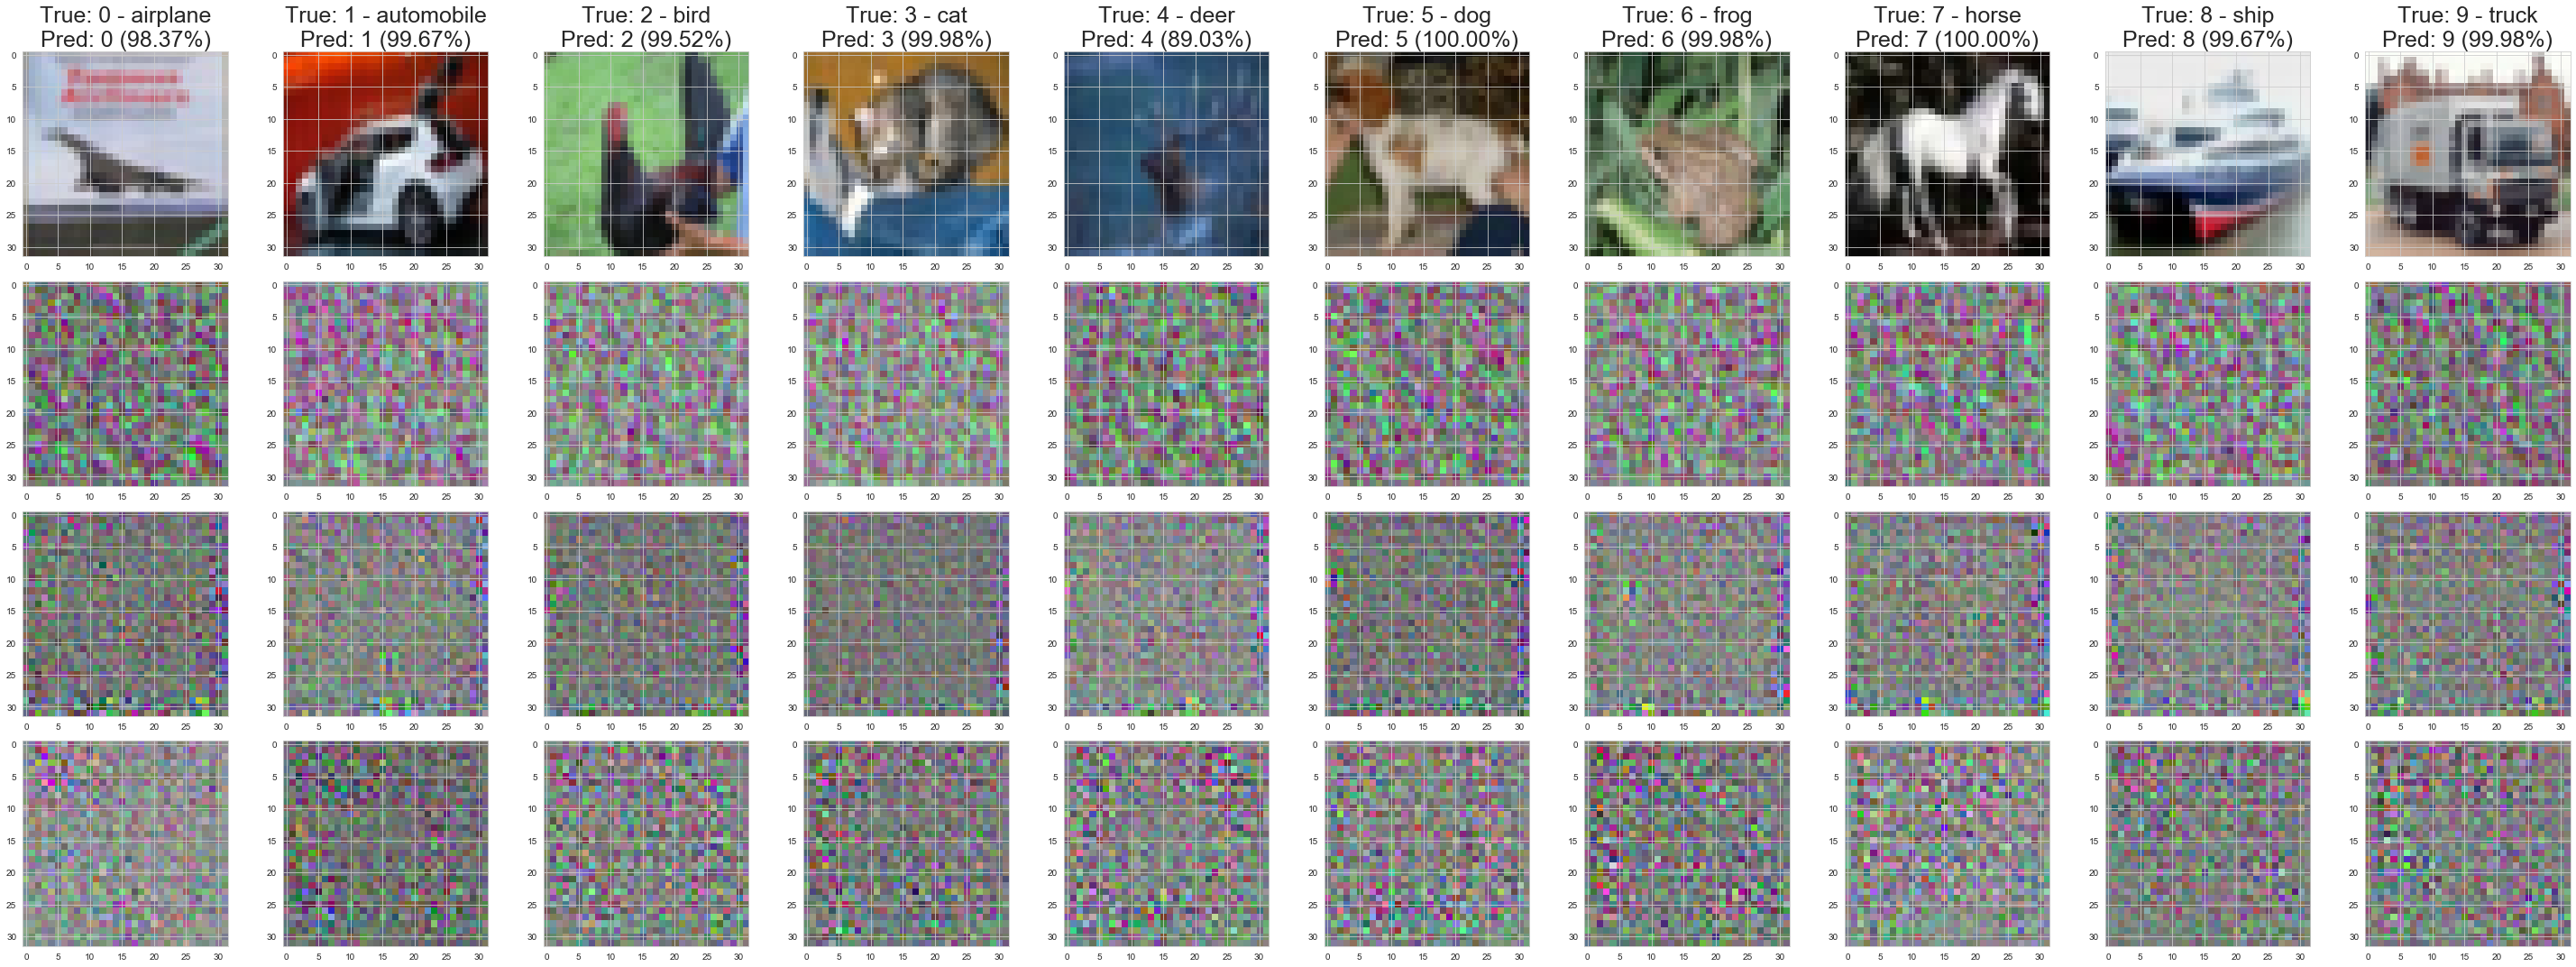

In [82]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:} - {1:}\nPred: {2:} ({3:.2%})'.format(i, cifar10_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar_result_SmoothGrad(n{},sigma{}).jpg'.format(param_n, param_sigma_multiplier), dpi=500)
    plt.show()